# Linear Regression

In [18]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Data Preprocessing

### **Exploring the dataset**

Let's start with loading the training data from the csv into a pandas dataframe



Load the datasets from GitHub. Train dataset has already been loaded for you in df below. To get test dataset use the commented code.

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')

Let's see what the first 5 rows of this dataset looks like

In [20]:
df.head()


,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities,SalePrice
0,11553,1051,1159,336,0,5,AllPub,158000
1,8400,1052,1052,288,0,5,AllPub,138500
2,8960,1008,1028,360,0,6,AllPub,115000
3,11100,0,930,308,0,7,AllPub,84900
4,15593,1304,2287,667,0,4,AllPub,225000


What are all the features present? What is the range for each of the features along with their mean?

In [21]:
print(df.columns.tolist())
df.describe().T


['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'OverallCond', 'Utilities', 'SalePrice']


,count,mean,std,min,25%,50%,75%,max
LotArea,1314.0,10622.104262,10430.181058,1300.0,7588.50,9501.5,11613.50,215245.0
TotalBsmtSF,1314.0,1058.311263,435.717809,0.0,796.00,992.0,1295.25,6110.0
GrLivArea,1314.0,1512.900304,524.854432,334.0,1124.25,1461.5,1775.75,5642.0
GarageArea,1314.0,473.480213,213.960987,0.0,336.00,480.0,576.00,1418.0
PoolArea,1314.0,2.643075,39.504255,0.0,0.00,0.0,0.00,738.0
OverallCond,1314.0,5.582192,1.112699,1.0,5.00,5.0,6.00,9.0
SalePrice,1314.0,180795.504566,77511.272784,34900.0,130000.00,163250.0,215000.00,755000.0


### **Feature Scaling and One-Hot Encoding**

You must have noticed that some features `(such as Utilities)` are not continuous values.
  
These features contain values indicating different categories and must somehow be converted to numbers so that the computer can understand it. `(Computers only understand numbers and not strings)`
  
These features are called categorical features. We can represent these features as a `One-Hot Representation`
  
  
You must have also noticed that all the other features, each are in a different scale. This can be detremental to the performance of our linear regression model and so we normalize them so that all of them are in the range $[0,1]$

> NOTE: When you are doing feature scaling, store the min/max which you will use to normalize somewhere. This is then to be used at testing time. Try to think why are doing this?

In [22]:
# Do the one-hot encoding here
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_NoSeWa
0,11553,1051,1159,336,0,5,158000,False
1,8400,1052,1052,288,0,5,138500,False
2,8960,1008,1028,360,0,6,115000,False
3,11100,0,930,308,0,7,84900,False
4,15593,1304,2287,667,0,4,225000,False


In [23]:
# Do the feature scaling here

# Convert all boolean columns to int
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

min_vals = df_encoded.min()
max_vals = df_encoded.max()
df_scaled = (df_encoded - min_vals) / (max_vals - min_vals)
df_scaled.head()



,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_NoSeWa
0,0.047924,0.172013,0.155426,0.236953,0.0,0.500,0.170948,0.0
1,0.033186,0.172177,0.135268,0.203103,0.0,0.500,0.143869,0.0
2,0.035804,0.164975,0.130746,0.253879,0.0,0.625,0.111235,0.0
3,0.045806,0.000000,0.112283,0.217207,0.0,0.750,0.069435,0.0
4,0.066807,0.213421,0.367935,0.470381,0.0,0.375,0.263991,0.0


### **Conversion to NumPy**

Ok so now that we have all preprocessed all the data, we need to convert it to numpy for our linear regression model
  
Assume that our dataset has a total of $N$ datapoints. Each datapoint having a total of $D$ features (after one-hot encoding), we want our numpy array to be of shape $(N, D)$

In our task, we have to predict the `SalePrice`. We will need 2 numpy arrays $

*   List item
*   List item

(X, Y)$. These represent the features and targets respectively

In [24]:
# Convert to numpy array

X = df_scaled.drop(columns=['SalePrice']).values
Y = df_scaled['SalePrice'].values.reshape(-1, 1)

print("X shape:", X.shape)
print("Y shape:", Y.shape)



X shape: (1314, 7)
Y shape: (1314, 1)


## Linear Regression formulation
  
We now have our data in the form we need. Let's try to create a linear model to get our initial (Really bad) prediction


Let's say a single datapoint in our dataset consists of 3 features $(x_1, x_2, x_3)$, we can pose it as a linear equation as follows:
$$ y = w_1x_1 + w_2x_2 + w_3x_3 + b $$
Here we have to learn 4 parameters $(w_1, w_2, w_3, b)$
  
  
Now how do we extend this to multiple datapoints?  
  
  
Try to answer the following:
- How many parameters will we have to learn in the cae of our dataset? (Don't forget the bias term)
- Form a linear equation for our dataset. We need just a single matrix equation which correctly represents all the datapoints in our dataset
- Implement the linear equation as an equation using NumPy arrays (Start by randomly initializing the weights from a standard normal distribution)

In [25]:
D = X.shape[1]
print(f"We need to learn {D} weights and 1 bias - Total {D + 1} parameters.")

np.random.seed(42)
W = np.random.randn(D, 1)
b = np.random.randn(1)

# Compute predictions
Y_pred = X.dot(W) + b


We need to learn 7 weights and 1 bias - Total 8 parameters.


How well does our model perform? Try comparing our predictions with the actual values

In [26]:
# Compute Mean Squared Error
mse = np.mean((Y - Y_pred) ** 2)
print("Initial MSE:", mse)

# Compare first few predictions
comparison = pd.DataFrame({
    'Actual': Y.flatten()[:5],
    'Predicted': Y_pred.flatten()[:5]
})
print(comparison)


Initial MSE: 1.2155031232695495
     Actual  Predicted
0  0.170948   1.111942
1  0.143869   1.039987
2  0.111235   1.087421
3  0.069435   1.018122
4  0.263991   1.638020


### **Learning weights using gradient descent**

So these results are really horrible. We need to somehow update our weights so that it correclty represents our data. How do we do that?

We must do the following:
- We need some numerical indication for our performance, for this we define a Loss Function ( $\mathscr{L}$ )
- Find the gradients of the `Loss` with respect to the `Weights`
- Update the weights in accordance to the gradients: $W = W - \alpha\nabla_W \mathscr{L}$

Lets define the loss function:
- We will use the MSE loss since it is a regression task. (Specify the assumptions we make while doing so as taught in the class).
- Implement this loss as a function. (Use numpy as much as possible)

In [27]:
def mse_loss_fn(y_true, y_pred):
  n = len(y_true)
  loss = np.sum((y_true - y_pred) ** 2) / n
  return loss


Calculate the gradients of the loss with respect to the weights (and biases). First write the equations down on a piece of paper, then proceed to implement it

In [28]:
def get_gradients(y_true, y_pred, W, b, X):
    """
    Calculates the gradients for the MSE loss function with respect to the weights (and bias)

    Args:
        y_true: The true values of the target variable (SalePrice in our case)
        y_pred: The predicted values of the target variable using our model (W*X + b)

        W: The weights of the model
        b: The bias of the model
        X: The input features

    Returns:
        dW: The gradients of the loss function with respect to the weights
        db: The gradients of the loss function with respect to the bias
    """
    n = len(y_true)
    error = y_true - y_pred

    dW = (-2 / n) * (X.T @ error)
    db = (-2 / n) * np.sum(error)

    return dW, db

Update the weights using the gradients

In [29]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate

    Args:
        weights: The current weights of the model
        bias: The current bias of the model

        gradients_weights: The gradients of the loss function with respect to the weights
        gradients_bias: The gradients of the loss function with respect to the bias

        lr: The learning rate

    Returns:
        weights_new: The updated weights of the model

    """
    weights_new = weights - lr * gradients_weights
    bias_new = bias - lr * gradients_bias

    return weights_new, bias_new

Put all these together to find the loss value, its gradient and finally updating the weights in a loop. Feel free to play around with different learning rates and epochs
  
> NOTE: The code in comments are just meant to be used as a guide. You will have to do changes based on your code

In [30]:
np.random.seed(42)
w = np.random.randn(X.shape[1], 1)
b = np.random.randn(1)

NUM_EPOCHS = 1000
LEARNING_RATE = 2e-2
losses = []

for epoch in range(NUM_EPOCHS):
    y_pred = X @ w + b
    loss = mse_loss_fn(Y, y_pred)
    losses.append(loss)

    dw, db = get_gradients(Y, y_pred, w, b, X)
    w, b = update(w, b, dw, db, LEARNING_RATE)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")


Epoch 0: Loss = 1.215503
Epoch 100: Loss = 0.033713
Epoch 200: Loss = 0.028828
Epoch 300: Loss = 0.024907
Epoch 400: Loss = 0.021752
Epoch 500: Loss = 0.019209
Epoch 600: Loss = 0.017155
Epoch 700: Loss = 0.015491
Epoch 800: Loss = 0.014139
Epoch 900: Loss = 0.013036


Now use matplotlib to plot the loss graph

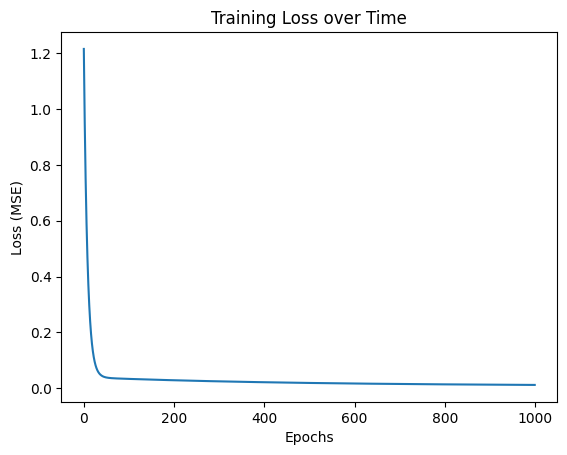

In [31]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Time')
plt.show()

### **Testing with test data**

Load and apply all the preprocessing steps used in the training data for the testing data as well. Remember to use the **SAME** min/max values which you used for the training set and not recalculate them from the test set. Also mention why we are doing this.

To load test data from GitHub, use the code below.


In [32]:
df_test = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/test_processed_splitted.csv')
print(df_test)

# Let's find all the columns that are missing in the test set
missing_cols = set(df.columns) - set(df_test.columns)

# Add these columns to the test set with all zeros
for col in missing_cols:
    df_test[col] = 0

if 'Utilities_AllPub' not in df_test.columns:
    df_test = df_test.join(pd.get_dummies(df_test['Utilities'], dtype = 'int32', prefix = 'Utilities'))
    df_test = df_test.drop('Utilities', axis = 1)



     LotArea  TotalBsmtSF  GrLivArea  GarageArea  PoolArea  OverallCond  \
0      15623         2396       4476         813       555            5   
1      11952          808       1969         534         0            6   
2       7558          896       1913         342         0            6   
3       6762         1187       1208         632         0            5   
4       8529         1454       1434         527         0            5   
..       ...          ...        ...         ...       ...          ...   
141     9135         1536       1536         532         0            5   
142    11639         1428       1428         480         0            5   
143    11475         1584       1776         888         0            5   
144     5925          907       1131         672         0            7   
145    14559         1008       1363         288         0            7   

    Utilities  SalePrice  
0      AllPub     745000  
1      AllPub     190000  
2      AllPub     

Using the weights learnt above, predict the values in the test dataset. Also answer the following questions:
- Are the predictions good?
- What is the MSE loss for the testset
- Is the MSE loss for testing greater or lower than training
- Why is this the case

In [33]:
# Scale the features

# Fill NaN values
df_test.fillna(0, inplace=True)

# Scale features
# Scale the features

# Fill NaN values (already done)
df_test.fillna(0, inplace=True)

df_test = df_test.reindex(columns=df_encoded.columns, fill_value=0)

# Safe feature scaling using training min/max
df_test_scaled = df_test.copy()
for col in df_test_scaled.columns:
    if max_vals[col] == min_vals[col]:
        df_test_scaled[col] = 0  # skip scaling for constant features
    else:
        df_test_scaled[col] = (df_test_scaled[col] - min_vals[col]) / (max_vals[col] - min_vals[col])



# Check for unexpected NaNs
if df_test_scaled.isna().any().any():
    print("NaN values detected in test set after scaling")
    print(df_test_scaled.isna().sum())
else:
    print("No NaN values detected after scaling ")

# Convert to numpy array
x_test = df_test_scaled.drop('SalePrice', axis=1).to_numpy()  # (N, D)
y_test = df_test_scaled['SalePrice'].to_numpy().reshape(-1, 1)  # (N, 1)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



No NaN values detected after scaling 
x_test shape: (146, 7)
y_test shape: (146, 1)


In [40]:
# Unscale the predictions back to the original scale
sale_price_min = df['SalePrice'].min()
sale_price_max = df['SalePrice'].max()

y_pred_test = x_test @ w + b

y_pred_test_unscaled = y_pred_test * (sale_price_max - sale_price_min) + sale_price_min
y_test_unscaled = y_test * (sale_price_max - sale_price_min) + sale_price_min

#Compare unscaled predictions with actual unscaled values
comparison_test_unscaled = pd.DataFrame({
    'Actual SalePrice (Unscaled)': y_test_unscaled.flatten()[:10],
    'Predicted SalePrice (Unscaled)': y_pred_test_unscaled.flatten()[:10]
})
print("\nSample Test Predictions vs Actual (Unscaled):")
print(comparison_test_unscaled)

print(sale_price_min, sale_price_max)
print(y_pred_test.min(), y_pred_test.max())

#Calculate MSE on unscaled values
mse_test_unscaled = np.mean((y_test_unscaled - y_pred_test_unscaled) ** 2)
print(f"\nMSE loss for the test set (Unscaled): {mse_test_unscaled:.2f}")


Sample Test Predictions vs Actual (Unscaled):
   Actual SalePrice (Unscaled)  Predicted SalePrice (Unscaled)
0                     745000.0                   299811.746452
1                     190000.0                   227082.048642
2                     177000.0                   145687.554981
3                     206000.0                   225577.504418
4                     189000.0                   191918.271118
5                     110000.0                   145943.221435
6                     119000.0                    73839.262195
7                     179600.0                   228095.043904
8                     185000.0                   206375.099321
9                     191000.0                   221876.836278
34900 755000
-0.1810804863262996 0.5407688212626193

MSE loss for the test set (Unscaled): 7494196970.65


In [ ]:
# Make predictions on the test set
y_pred_test = x_test @ w + b

# Compute the MSE loss for the test set
loss_test = mse_loss_fn(y_test, y_pred_test)

print(f"MSE loss for the test set: {loss_test:.6f}")

# Compare a few predictions with actual values (optional, but helpful)
comparison_test = pd.DataFrame({
    'Actual SalePrice': y_test.flatten()[:10],
    'Predicted SalePrice': y_pred_test.flatten()[:10]
})
print("\nSample Test Predictions vs Actual:")
print(comparison_test)

Let's analyze the results from the test set:

- **Are the predictions good?** To determine if the predictions are "good", we need to compare them to the actual SalePrice values and consider the scale of the original prices. The MSE loss value gives us a quantitative measure. Additionally, looking at the sample predictions compared to the actual values can give us a qualitative sense of the accuracy. The scaled loss value needs to be unscaled to understand the error in the original price range.

- **What is the MSE loss for the testset?** The code output above shows the calculated MSE loss for the test set.

- **Is the MSE loss for testing greater or lower than training?** Compare the MSE loss value from the test set with the final training loss value printed during the training loop.

- **Why is this the case?**
    * If the test loss is significantly higher than the training loss, it might indicate that the model has **overfitted** to the training data and does not generalize well to unseen data.
    * If the test loss is similar to the training loss, it suggests the model is generalizing reasonably well.
    * If the test loss is lower than the training loss, it could be due to the smaller size of the test set or just random chance, but it's less common to see a significantly lower test loss in practice without issues like data leakage or a much easier test set.

To get a better sense of the prediction accuracy in the original scale, we need to unscale the predicted `SalePrice` values using the `min_vals` and `max_vals` of the *original* `SalePrice` from the training data. Let's do that next.

In [37]:
extra_cols = list(set(df_test.columns) - set(df.columns))
print("Extra columns in df_test:", extra_cols)

missing_cols = list(set(df.columns) - set(df_test.columns))
print("Missing columns in df_test:", missing_cols)

Extra columns in df_test: ['Utilities_NoSeWa']
Missing columns in df_test: ['Utilities']


In [36]:
# Make predictions
y_pred_test = x_test @ w + b  # (N, 1)
loss_test = mse_loss_fn(y_pred_test, y_test)
print(f"MSE loss for the test set (Scaled): {loss_test:.6f}")

# Scale the predictions back to the original SalePrice range
sale_price_min = min_vals['SalePrice']
sale_price_max = max_vals['SalePrice']

# Unscale predictions and true values
y_pred_test_scaled = y_pred_test * (sale_price_max - sale_price_min) + sale_price_min
y_test_scaled = y_test * (sale_price_max - sale_price_min) + sale_price_min


MSE loss for the test set (Scaled): 0.014452


In [44]:
idx = np.random.randint(0, x_test.shape[0], 5)
y_pred_test_sample = y_pred_test_scaled[idx].round().astype(int)
y_true_test_sample = y_test_scaled[idx].round().astype(int)

print('Predicted SalePrice: \t', y_pred_test_sample.squeeze().tolist())
print('Actual SalePrice: \t', y_true_test_sample.squeeze().tolist())
print('\nTest Loss: \t\t', loss_test)

Predicted SalePrice: 	 [189189, 270249, 198118, 90461, 145502]
Actual SalePrice: 	 [135000, 213500, 176500, 85000, 89500]

Test Loss: 		 0.014452383647539008


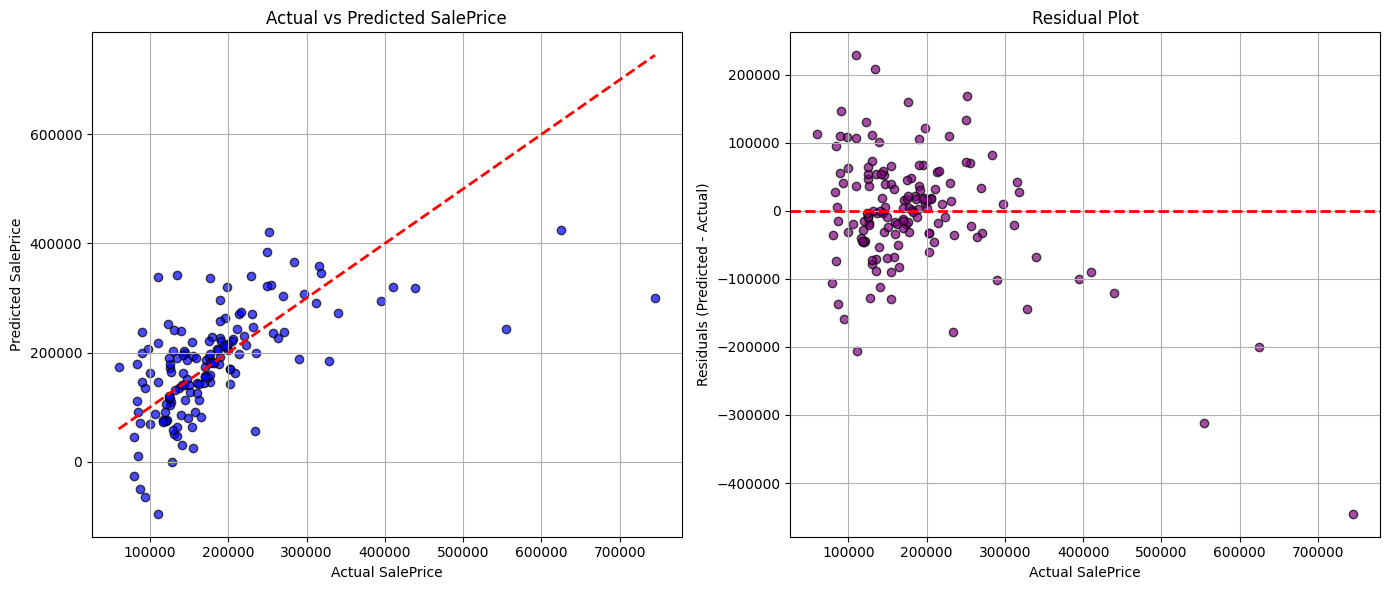

In [45]:
#just to check models predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Actual vs Predicted
axes[0].scatter(y_test_scaled, y_pred_test_scaled, alpha=0.7, color='blue', edgecolors='k')
axes[0].plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()],
             'r--', linewidth=2)
axes[0].set_xlabel("Actual SalePrice")
axes[0].set_ylabel("Predicted SalePrice")
axes[0].set_title("Actual vs Predicted SalePrice")
axes[0].grid(True)

#Residual Plot
residuals = y_pred_test_scaled - y_test_scaled
axes[1].scatter(y_test_scaled, residuals, alpha=0.7, color='purple', edgecolors='k')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Actual SalePrice")
axes[1].set_ylabel("Residuals (Predicted - Actual)")
axes[1].set_title("Residual Plot")
axes[1].grid(True)

plt.tight_layout()
plt.show()
